In [2]:
import pandas as pd

In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

C:\Users\rutva


In [4]:
df = pd.read_excel('Database for OAA.xlsx',sheet_name='Age')

In [5]:
df

,Headcount Full-Time Fall,Age,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
0,Algonquin College,0 - 17,360,362,309,359,334,353,368,345,292,336.0
1,Algonquin College,18 - 19,5061,5350,5329,5196,5090,5229,5211,5257,4427,4385.0
2,Algonquin College,20 - 24,7149,7346,7442,7787,7625,7825,8229,8214,7378,6361.0
3,Algonquin College,25 - 29,1919,2064,2153,2282,2323,2595,2824,3027,2915,2644.0
4,Algonquin College,30 - 34,630,716,742,742,854,995,1095,1178,1254,1282.0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,St. Lawrence College,40 - 44,113,104,90,80,92,105,124,139,106,124.0
260,St. Lawrence College,45 - 49,66,74,60,60,57,72,71,71,64,65.0
261,St. Lawrence College,50 - 54,42,34,32,31,35,49,59,48,37,30.0
262,St. Lawrence College,55 - 59,10,21,15,14,,13,17,17,26,19.0


In [6]:
print(df.columns)

Index(['Headcount Full-Time Fall', 'Age', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019',
       '2019-2020', '2020-2021', '2021-2022'],
      dtype='object')


C:\Users\rutva\AppData\Local\Temp\ipykernel_32608\401177626.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['Headcount Full-Time Fall', 'Age']).sum().unstack()


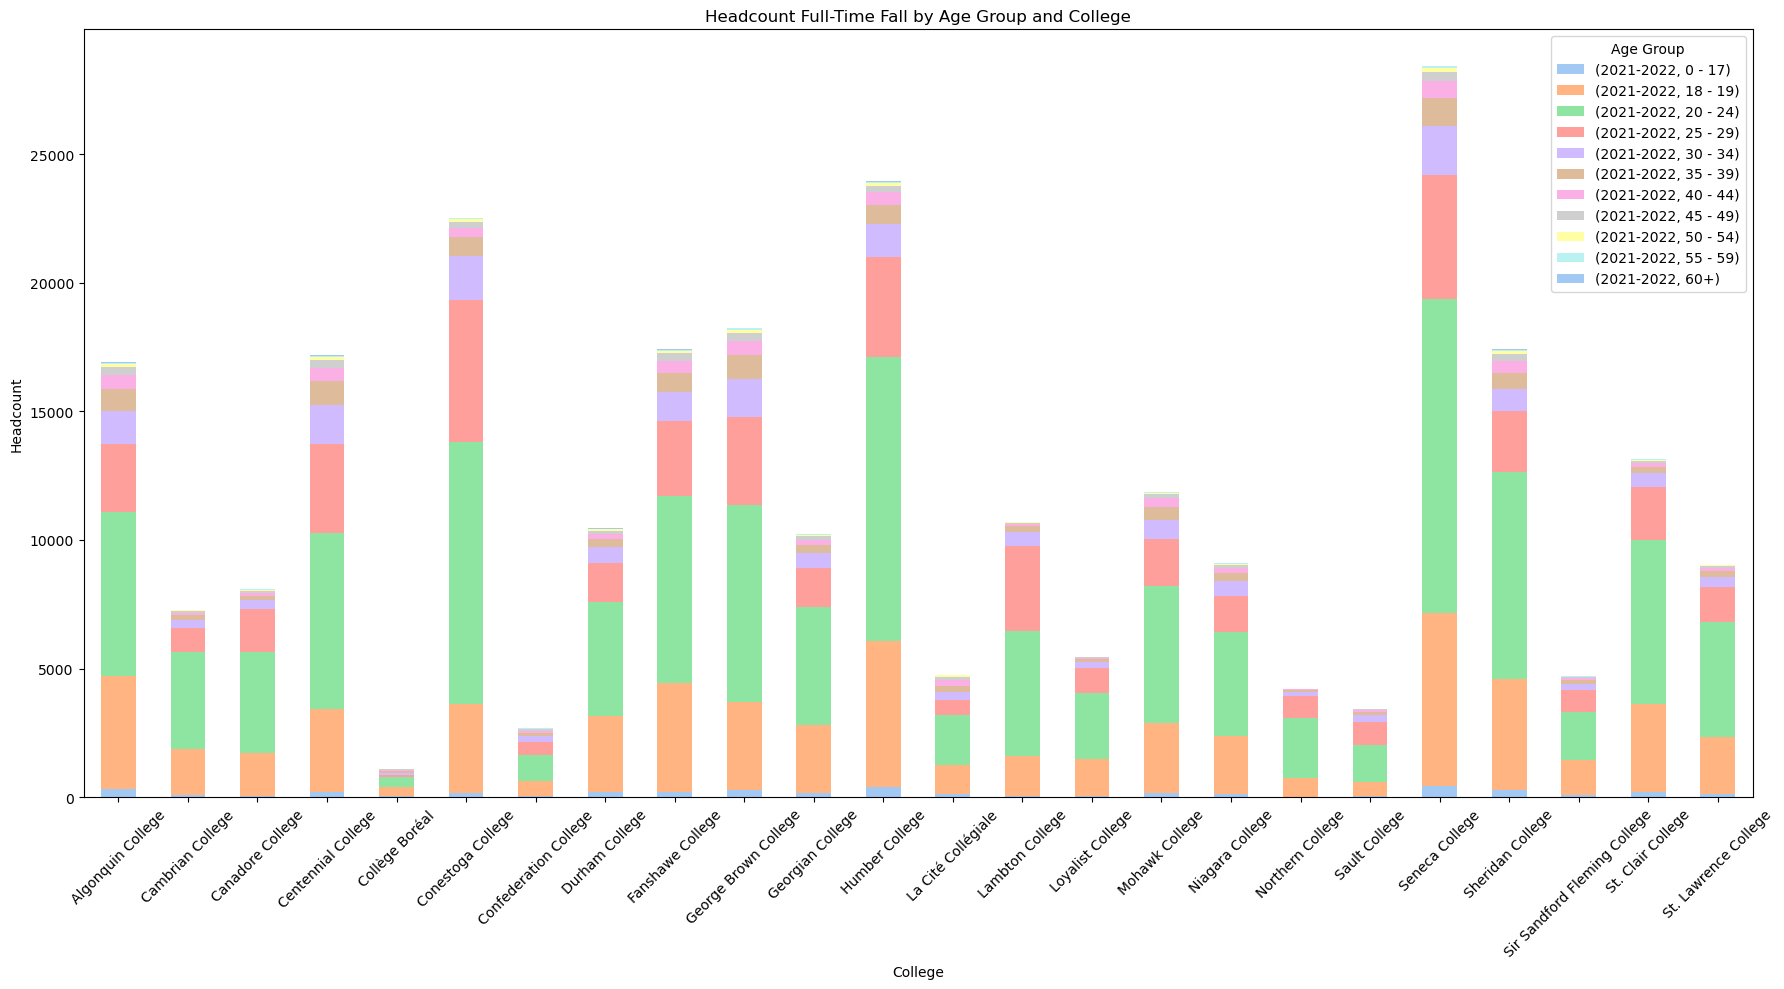

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Database for OAA.xlsx',sheet_name='Age')

# Grouping data by college name and age group
grouped_data = df.groupby(['Headcount Full-Time Fall', 'Age']).sum().unstack()

# Setting a custom color palette
colors = sns.color_palette('pastel')  # You can choose any Seaborn color palette

# Plotting the data with the custom color palette
grouped_data.plot(kind='bar', stacked=True, figsize=(18, 10), color=colors)
plt.title('Headcount Full-Time Fall by Age Group and College')
plt.xlabel('College')
plt.ylabel('Headcount')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

C:\Users\rutva\AppData\Local\Temp\ipykernel_32608\2847477104.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_counts = df.groupby('Gender').sum()


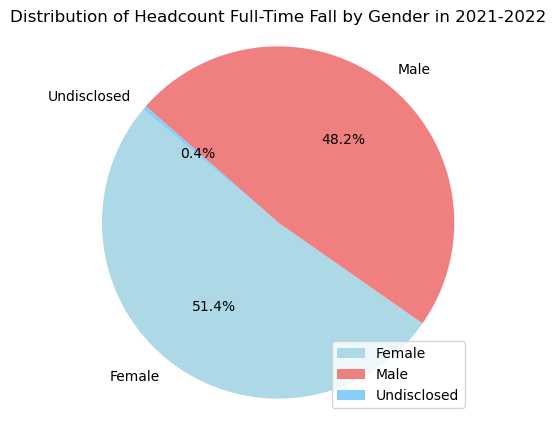

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
df = pd.read_excel('Database for OAA.xlsx',sheet_name='Gender')

# Grouping data by gender and summing up the headcount
gender_counts = df.groupby('Gender').sum()

# Define custom colors
colors = ['lightblue', 'lightcoral', 'lightskyblue']

# Plotting the pie chart with custom colors
plt.figure(figsize=(5, 5))
plt.pie(gender_counts['2021-2022'], labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Headcount Full-Time Fall by Gender in 2021-2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(gender_counts.index, loc='lower right')
plt.show()


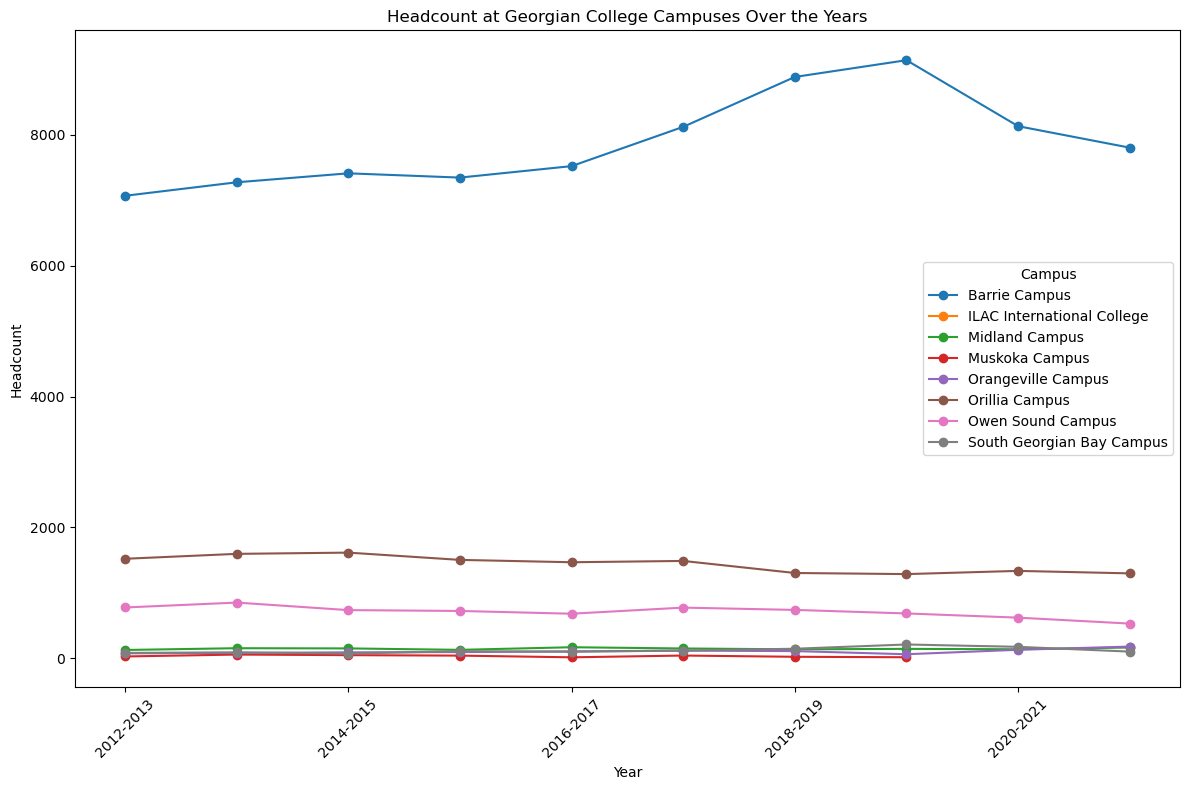

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in an Excel file named 'Database for OAA.xlsx' in a sheet named 'Headcount'
df = pd.read_excel('Database for OAA.xlsx', sheet_name='Campus')

# Filter the data for Algonquin College
college_data = df[df['Headcount Full-Time Fall'] == 'Georgian College']

# Pivot the data to have years as columns and campuses as rows
pivot_data = college_data.set_index('Campus').drop(columns='Headcount Full-Time Fall').transpose()

# Plotting the line chart
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='line', ax=plt.gca(), marker='o')  # Line chart with markers at data points
plt.title('Headcount at Georgian College Campuses Over the Years')
plt.xlabel('Year')
plt.ylabel('Headcount')
plt.xticks(rotation=45)
plt.legend(title='Campus')
plt.tight_layout()
plt.show()


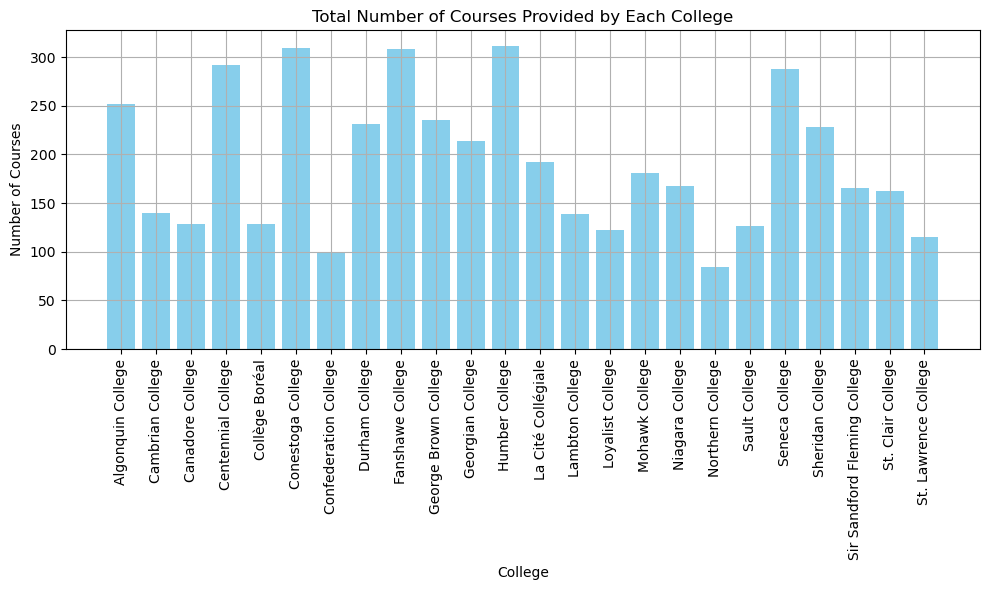

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Database for OAA.xlsx', sheet_name='Program')

college_course_counts = df.groupby('Headcount Full-Time Fall')['Program'].nunique().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(college_course_counts['Headcount Full-Time Fall'], college_course_counts['Program'], color='skyblue')

plt.xlabel('College')
plt.ylabel('Number of Courses')
plt.title('Total Number of Courses Provided by Each College')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('Database for OAA.xlsx', sheet_name='CIP')

# Group by 'Instructional Program Class En Title' and sum the 'Headcount Full-Time Fall'
program_counts = df.groupby('Instructional Program Class En Title')['Headcount Full-Time Fall'].sum()

# Sort the programs by headcount in descending order and select the top 5
top_programs = program_counts.sort_values(ascending=False).head(5)

# Extract data for the top 5 programs
top_program_data = df[df['Instructional Program Class En Title'].isin(top_programs.index)]

# Print the extracted data
print(top_program_data)

               College Name Instructional Program Class Code  \
15        Algonquin College                          52.0101   
80        Algonquin College                          19.0709   
82        Algonquin College                          43.0107   
83        Algonquin College                          52.0201   
84        Algonquin College                               NC   
...                     ...                              ...   
17156     St. Clair College                               NC   
17174  St. Lawrence College                          19.0709   
17183  St. Lawrence College                          43.0107   
17210  St. Lawrence College                          52.0101   
17211  St. Lawrence College                          52.0201   

                  Instructional Program Class En Title  \
15                          Business/commerce, general   
80                       Child care provider/assistant   
82                     Criminal justice/police science   

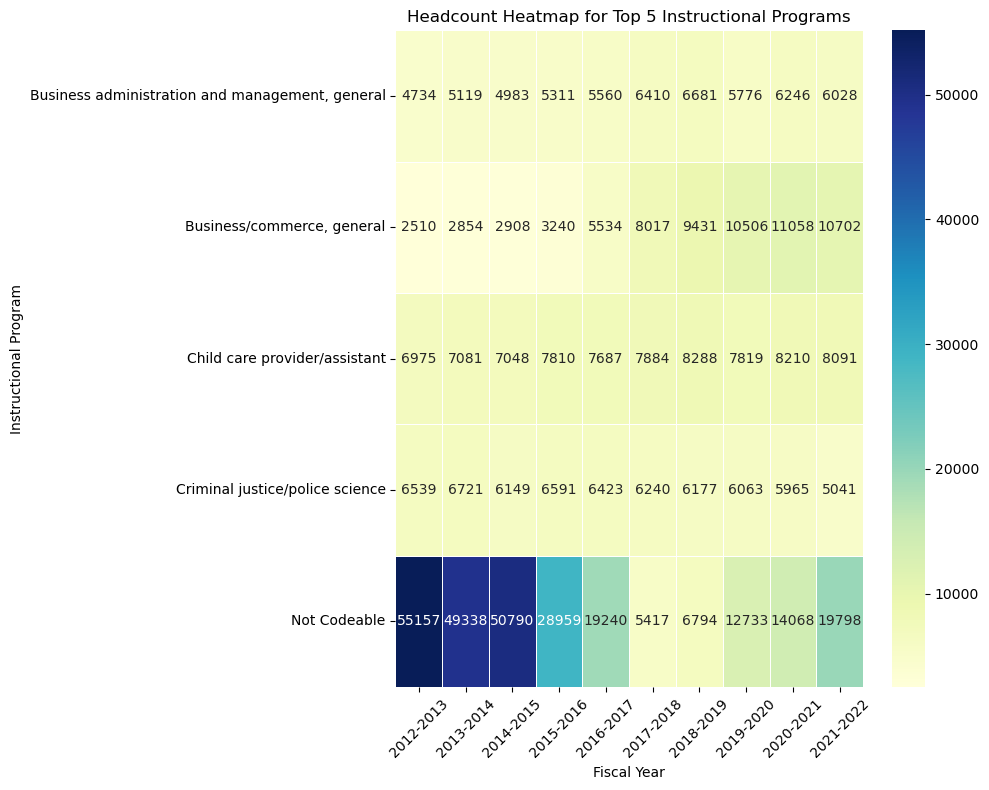

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('Database for OAA.xlsx', sheet_name='CIP')

# Group by 'Instructional Program Class En Title' and sum the 'Headcount Full-Time Fall'
program_counts = df.groupby('Instructional Program Class En Title')['Headcount Full-Time Fall'].sum()

# Sort the programs by headcount in descending order and select the top 5
top_programs = program_counts.sort_values(ascending=False).head(5)

# Extract data for the top 5 programs
top_program_data = df[df['Instructional Program Class En Title'].isin(top_programs.index)]

# Pivot the data
pivot_df = top_program_data.pivot_table(index='Instructional Program Class En Title', 
                                        columns='Fiscal Year', 
                                        values='Headcount Full-Time Fall', 
                                        aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Headcount Heatmap for Top 5 Instructional Programs')
plt.xlabel('Fiscal Year')
plt.ylabel('Instructional Program')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


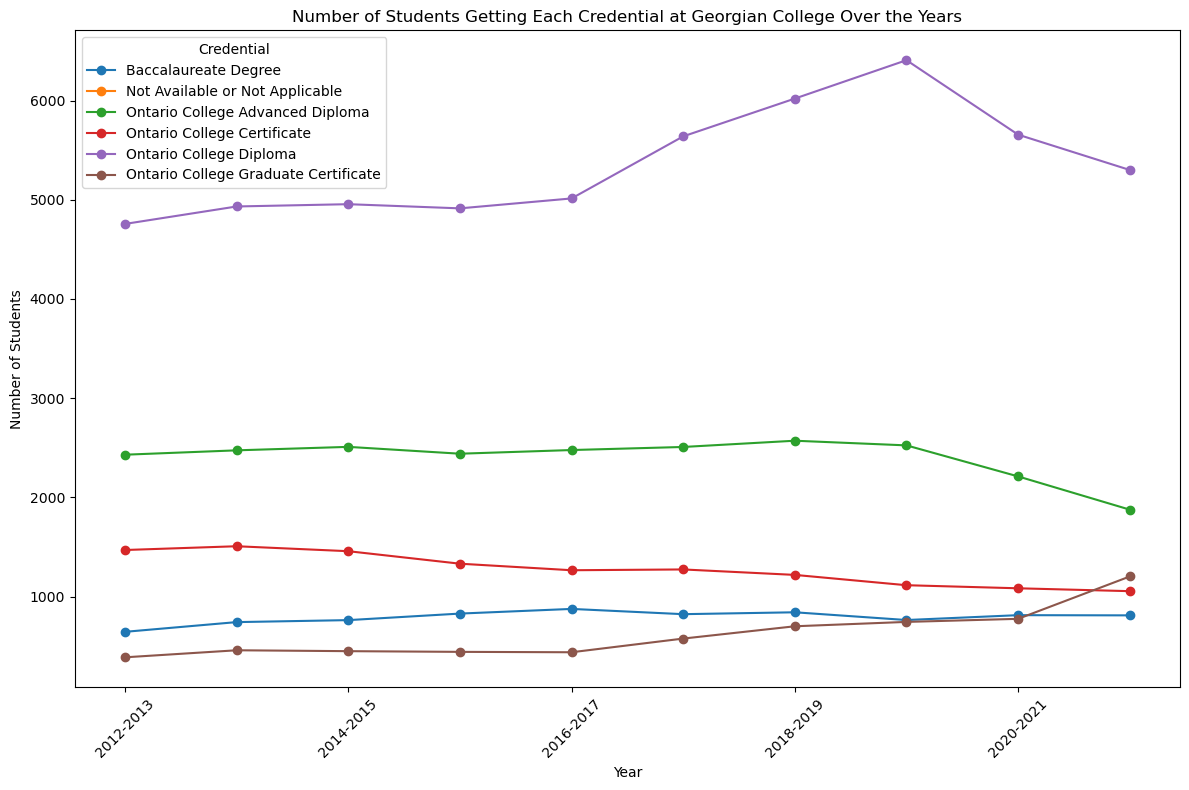

In [13]:
df = pd.read_excel('Database for OAA.xlsx', sheet_name='Credentials')

# Filter the data for Georgian College
college_data = df[df['Headcount Full-Time Fall'] == 'Georgian College']

# Drop the unnecessary 'Algonquin College' column
college_data = college_data.drop(columns='Headcount Full-Time Fall')

# Transpose the data to have years as columns and credentials as rows
pivot_data = college_data.set_index('Credentials').transpose()

# Plotting the line chart
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='line', ax=plt.gca(), marker='o')  # Line chart with markers at data points
plt.title('Number of Students Getting Each Credential at Georgian College Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Credential')
plt.tight_layout()
plt.show()